/home/sheharyaar/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


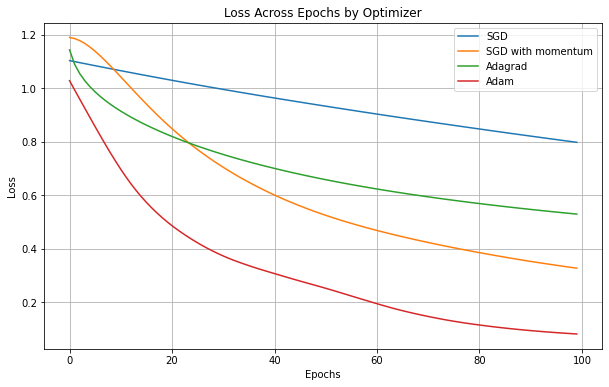

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and prepare the Iris data
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Define the neural network model
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Optimizers to use
optimizers = {
    'SGD': lambda params: optim.SGD(params, lr=0.01),
    'SGD with momentum': lambda params: optim.SGD(params, lr=0.01, momentum=0.9),
    'Adagrad': lambda params: optim.Adagrad(params, lr=0.01),
    'Adam': lambda params: optim.Adam(params, lr=0.01)
}

epochs = 100
loss_history = {k: [] for k in optimizers.keys()}

# Training loop for each optimizer
for opt_name, opt_func in optimizers.items():
    # Reset the model
    net = IrisNet()
    criterion = nn.CrossEntropyLoss()
    optimizer = opt_func(net.parameters())
    
    for epoch in range(epochs):
        optimizer.zero_grad()  # Zero the gradients
        outputs = net(X_tensor)  # Forward pass
        loss = criterion(outputs, y_tensor)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        
        loss_history[opt_name].append(loss.item())  # Store the loss for this epoch

# Plotting the results
plt.figure(figsize=(10, 6))
for opt_name, losses in loss_history.items():
    plt.plot(losses, label=opt_name)
plt.title("Loss Across Epochs by Optimizer")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
